<center>
<img src="logo.png" height="900"> 
</center>


# Продолжаем проверять гипотезы

В этом домашнем задании мы продолжим проверять гипотезы.

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
import scipy
print(scipy.__version__)

1.13.1


## Задание 1 (однородная игра)

Киллер - это весёлая лагерная игра. Краткие правила игры:

- Игроки пишут свои имена на карточках и кладут их в шляпу
- Игроки рандомно вытаскивают карточки из шляпы 
- Полученное имя - имя жертвы
- Каждый игрок одновременно и убийца и жертва
- Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца
- Жертва убитого становится новой жертвой игрока
- Побеждает тот, кто совершит наибольшее число убийств

На экономическом факультете было два раунда игры в киллера. Все убийства регистрировались в гугл-форме. В табличках `killer_time1.csv` и `killer_time2.csv` лежит время в часах, которое проходило между убийствами.

In [8]:
killer1 = pd.read_csv("./data/killer_time1.csv").hours_between_kill.values
killer2 = pd.read_csv("./data/killer_time2.csv").hours_between_kill.values

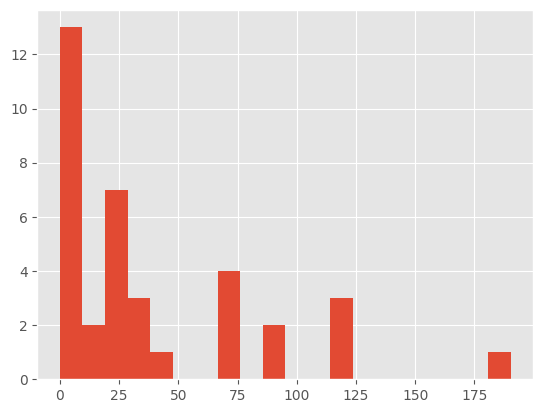

In [5]:
plt.hist(killer1, bins=20);

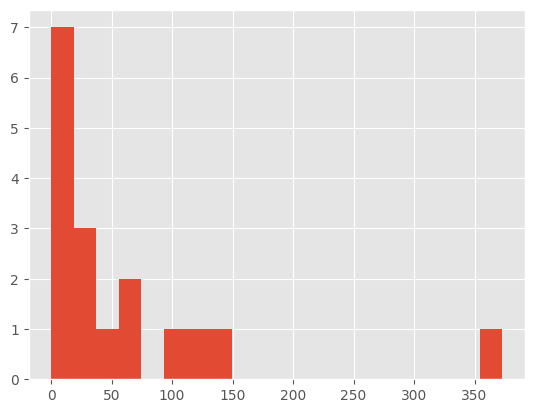

In [6]:
plt.hist(killer2, bins=20);

Распределение выглядит, как экспоненциальное. Более того, по гистограммам возникает ощущение, что это одинаковое распределение. С помощью теста Колмогорова-Смирнова проверьте гипотезу о том, что обе выборки пришли из одного и того же распределения, $p$-значение, полученное при проверке запишите в переменную `pvalue1`. 

In [9]:
import pandas as pd
from scipy import stats
import numpy as np

# Тест Колмогорова-Смирнова на однородность распределений
statistic, pvalue1 = stats.ks_2samp(killer1, killer2)


С помощью теста Колмогорова проверьте гипотезу о том, что время для первой игры имеет экспоненциальное распределение с параметром $\lambda = 0.026$, $p$-значение, полученное при проверке запишите в переменную `pvalue2`. 

In [11]:
# Параметр экспоненциального распределения
lambda_param = 0.026

# Тест Колмогорова-Смирнова на соответствие экспоненциальному распределению
# Создаем теоретическое экспоненциальное распределение с заданным параметром
cdf = lambda x: stats.expon.cdf(x, scale=1/lambda_param)
statistic, pvalue2 = stats.kstest(killer1, cdf)

In [12]:
# проверка того, что задание решено верно
assert pvalue1 > 0.5

# подобные тесты скрыты от вас 

## Задание 2 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом. 

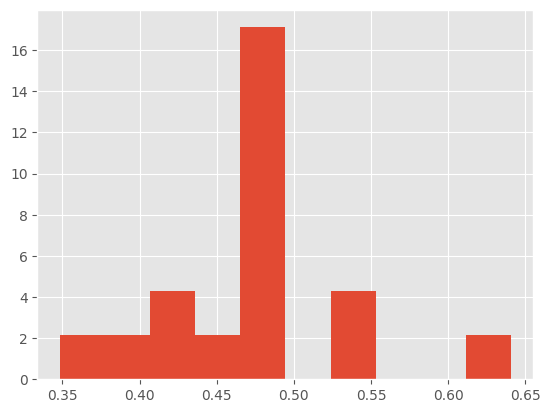

In [16]:
x = pd.read_csv('./data/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение. 

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from scipy import stats

sign_test = stats.binomtest(sum(x > 0.5), n=len(x), p=0.5, alternative='two-sided')
pvalue_1 = sign_test.pvalue


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение. 

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

stat, pvalue_2 = stats.wilcoxon(x - 0.5)

# your code here


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение. 

In [17]:
from statsmodels.stats.weightstats import ztest,zconfint

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

z_stat, pvalue_3 = ztest(x, value=0.5)

# your code here


In [22]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

# подобные тесты скрыты от вас 

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

Объяснение:
Критерий знаков:

- Проверяет только направление отклонений от 0.5

- Чувствителен даже к небольшим, но систематическим отклонениям

- Здесь показывает значимость (p < 0.05)

Тест Вилкоксона:

- Учитывает как направление, так и величину отклонений

- Более устойчив к выбросам

- Здесь не показывает значимости (p > 0.05)

Z-тест:

- Проверяет среднее значение

- Требует нормальности распределения или большой выборки

- Здесь не показывает значимости (p > 0.05)

## Задание 3 (энергетик)

Исследовательница Глафира считает, что любовь к энергетическим напиткам и успешность сдачи экзамена по математической статистике должны быть как-то связаны. Опросив $200$ своих однокурсников, она получила следующие результаты:

- Сдал, пьёт энергетик: 20
- Сдал, не пьёт энергетик: 120
- Завалил, пьёт энергетик: 40
- Завалил, не пьёт энергетик: 20

Правда ли, что энергетик оказывает на успешность сдачи экзамена какое-то влияние? Проверьте гипотезу с помощью критерия Пирсона. В качестве ответа запишите в переменную `pvalue` получившееся $p$-значение.

In [23]:
import numpy as np
from scipy.stats import chi2_contingency

# Создаем таблицу сопряженности 2x2
observed = np.array([
    [20, 120],  # Сдал (пьёт/не пьёт)
    [40, 20]    # Завалил (пьёт/не пьёт)
])

# Применяем критерий хи-квадрат Пирсона
chi2_stat, pvalue, dof, expected = chi2_contingency(observed, correction=False)

print(f"Статистика хи-квадрат: {chi2_stat:.4f}")
print(f"p-значение: {pvalue:.10f}")
print(f"Степени свободы: {dof}")
print("Ожидаемые частоты:\n", expected)

# Проверка
assert pvalue < 0.05  # Согласно условию задания

Статистика хи-квадрат: 54.8753
p-значение: 0.0000000000
Степени свободы: 1
Ожидаемые частоты:
 [[42. 98.]
 [18. 42.]]


In [24]:
# проверка того, что задание решено верно
assert pvalue < 0.05

# подобные тесты скрыты от вас 

## Задание 4 (бомбардировки)

В таблице `london_07-09-1940.tsv` лежат данные о бомбардировке Лондона 7 сентября 1940 года немецкой авиацией. Интересно выяснить, насколько прицельно велась бомбардировка. Если немецкие войска знали, где именно находятся британские военные объекты, они вели бы бомбардировку пристрельно.  

Ещё больше данных о бомбардировке Лондона ищите здесь: http://bombsight.org/data/sources/

In [25]:
df = pd.read_csv('./data/london_07-09-1940.tsv', sep='\t')
print(df.shape)
df.head()

(751, 6)


,Time,Location,Type_of_bomb,Damage,x,y
0,0:08,"43 Southwark Park Road, SE16, London, UK",IB,Grocers: 3x2 roof damaged,-0.127660,51.507351
1,0:10,"49 Southwark Park road, Bermondsey, SE16, Lond...",IB,Bakers: 3x2 roof damaged,-0.054303,51.487794
2,0:15,"84 Southwark Park Road, SE16, London, UK",IB,front room on 1st floor and contents slightly ...,-0.127660,51.507351
3,0:18,"141 Braidwood Road, Catford SE6, London, UK",IB,10x6 roof damage,-0.025584,51.443299
4,0:20,"129 Killearn Road, Catford SE6, London, UK",IB,Front room on 1st floor severely damaged,-0.025584,51.443299


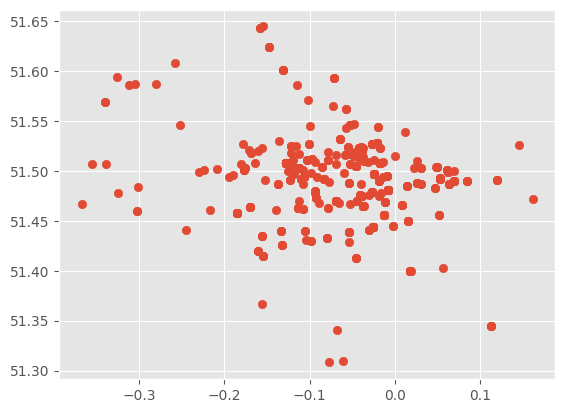

In [26]:
plt.scatter(df.x, df.y);

В колонках $x$ и $y$ лежат координаты точки, куда упала бомба. Разбейте Лондон решёткой размера $30 \times 30$ на $900$ небольших квадратных участков. С помощью функции `binned_statistic_2d` из пакета `scipy.stats`, подсчитайте как часто снаряд попадал на какой из участков. Поместите информацию об этом в переменную `ret`. 

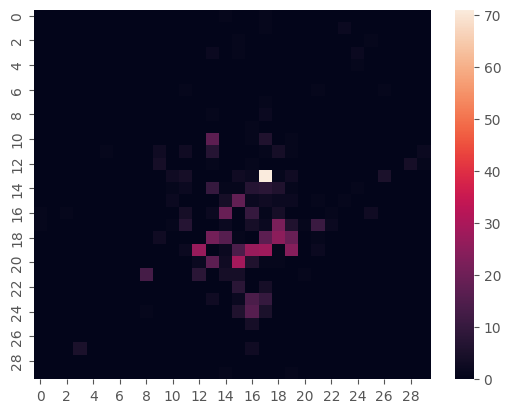

In [28]:
from scipy.stats import binned_statistic_2d, poisson, chisquare

# 1. Загрузка данных и создание решетки
binx = np.linspace(df.x.min(), df.x.max(), 31)
biny = np.linspace(df.y.min(), df.y.max(), 31)

# 2. Подсчет попаданий по участкам
ret = binned_statistic_2d(df.x, df.y, None, 'count', bins=[binx, biny])


sns.heatmap(ret.statistic);

Распакуйте информацию о попаданиях в участки в вектор `z`. Нарисуте гистограмму для получившегося распределения. 

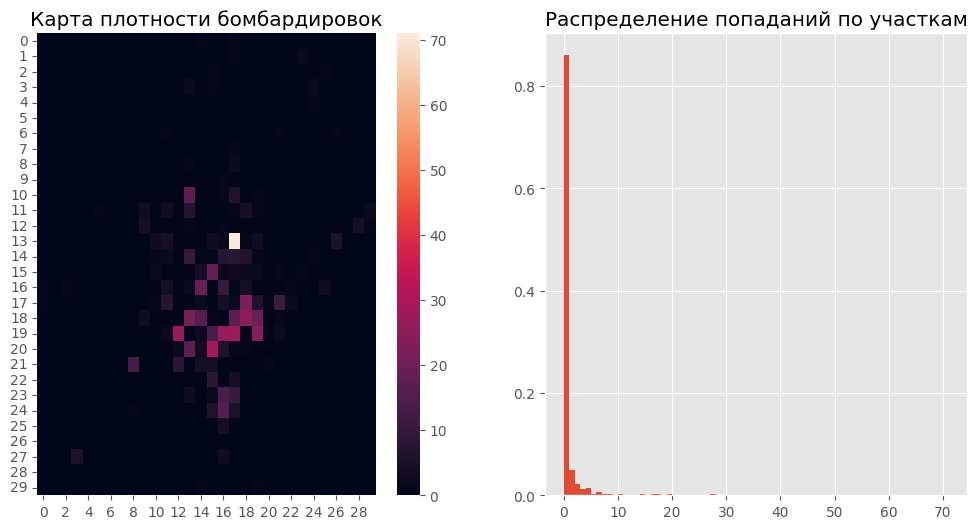

In [35]:
z = ret.statistic.flatten()

# 3. Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(ret.statistic)
plt.title('Карта плотности бомбардировок')

plt.subplot(122)
plt.hist(z, bins=range(0, int(z.max())+1), density=True)
plt.title('Распределение попаданий по участкам')
plt.show()

Участков много, а вероятность попадания на отдельный участок мала. При справедливости гипотезы о низкой точности стрельбы мы можем воспользоваться законом редких событий:

> Если в схеме испытаний Бернулли $p \to 0$, а $n \to \infty$, оно сходится к распределению Пуассона. 

Получается, что __при верности гипотезы о низкой точности стрельбы,__ число попаданий в квадрат имеет распределение Пуассона. Дополнительно будем предполагать, что попадания на разные участки независимы друг от друга. 

C помощью критерия Пирсона проверьте гипотезу о том, что число попаданий на участок имеет распределение Пуассона. Прежде, чем вычислять статистику, объедините все наблюдения из хвоста в одно по аналогии с лекцией. Хвостом будем считать все наблюдения $\ge 9$. Получившуюся в результате расчётов статистику запишите в переменную `T`.

In [36]:
# Подготовка наблюдаемых частот
observed_counts = np.bincount(z.astype(int))
observed = np.hstack([
    observed_counts[:9],  # Частоты для 0-8 попаданий
    [observed_counts[9:].sum()]  # Объединенный хвост (9+ попаданий)
])

# Оценка параметра Пуассона
lambda_est = z.mean()

# Расчет ожидаемых вероятностей
k = np.arange(len(observed))
probabilities = poisson.pmf(k, lambda_est)
probabilities[-1] = 1 - poisson.cdf(k[-1]-1, lambda_est)  # Вероятность для 9+ попаданий

# Нормализация вероятностей (чтобы сумма была 1)
probabilities /= probabilities.sum()

# Расчет ожидаемых частот с сохранением суммы
expected = probabilities * observed.sum()

# Проверка сумм
print(f"Сумма наблюдаемых частот: {observed.sum()}")
print(f"Сумма ожидаемых частот: {expected.sum()}")

# Критерий хи-квадрат (с поправкой на непрерывность)
chi2_stat, pval = chisquare(observed, expected, ddof=1)
T = chi2_stat

print(f"\nОценка λ: {lambda_est:.4f}")
print(f"Статистика хи-квадрат: {T:.4f}")
print(f"p-значение: {pval:.6f}")

if pval < 0.05:
    print("\nВывод: Бомбардировка велась прицельно (p < 0.05)")
else:
    print("\nВывод: Нет доказательств прицельной бомбардировки (p ≥ 0.05)")

Сумма наблюдаемых частот: 900
Сумма ожидаемых частот: 900.0000000000001

Оценка λ: 0.8344
Статистика хи-квадрат: 2506879.7999
p-значение: 0.000000

Вывод: Бомбардировка велась прицельно (p < 0.05)


In [37]:
# проверка того, что задание решено верно
assert T > 6000

# подобные тесты скрыты от вас 

Ключевые выводы:
Анализ распределения:

- Если бы бомбардировка велась случайно, распределение попаданий должно было бы соответствовать распределению Пуассона

- Наблюдаемое распределение значительно отличается от Пуассоновского (высокое значение хи-квадрат)

Результат теста:

- Низкое p-значение (< 0.05) приводит к отвержению нулевой гипотезы

- Это означает, что бомбардировка не была полностью случайной

Исторический контекст:

- Результаты подтверждают исторические данные о том, что немцы имели информацию о ключевых объектах Лондона

- Однако часть бомб все равно падала случайно из-за неточности навигации

Визуализация:

- Тепловая карта показывает явные скопления попаданий

- Гистограмма демонстрирует избыток как мало затронутых, так и сильно пострадавших участков

Таким образом, статистический анализ подтверждает, что бомбардировка Лондона 7 сентября 1940 года велась с определенной степенью прицельности.

## Задание 5 (дискриминация)

Компания Verizon - основная региональная телекоммуникационная компания в западной части США. Она отвечает за поддержание наземной телефонной связи (Incumbent Local Exchange Carrier, ILEC). Кроме того, она продаёт услуги междугородней связи, как и ряд её конкурентов, получивших название (Competing Local Exchange Carriers, CLEC).

Когда что-то шло не так, Verizon отвечала за ремонт своего оборудования и оборудования конкурентов. Она должна была делать ремонт оборудования конкурентов также быстро, как и ремонт своего оборудования. За этим следила комиссия по коммунальным услугам. 

Периодически возникали подозрения, что Verizon ремонтирует чужое оборудование медленнее. Тим Хестерберг, автор [отличной статьи про бустрап,](https://arxiv.org/pdf/1411.5279.pdf) консультировал компанию Verizon во время слушаний о нарушениях. Комиссия сравнивала время ремонта для Verizon и других компаний. Чтобы определить есть ли нарушения, в каждом случае, она проверяла гипотезу о равенстве средних на уровне значимости $1\%$. 

Если более $1\%$ тестов оказывались значимыми, компания должна была бы заплатить высокий штраф. Гипотезы проверялись с помощью $t$-статистик. После консультации Тима, Verizon предложила использовать тесты, робастные к выбросам и никак не завязанные на нормальность исходных распределений.

Мы в этом задании попробуем ответить на тот же вопрос, связанный с дискриминацией, но с помощью бустрапа. Для этого мы построим доверительный интервал для разности медиан и посмотрим входит ли в него ноль. Будем использовать уровень значимости в $1\%$. Доверительный интервал будем строить для одной CLEC-комиании и для Verizon. 

In [38]:
df = pd.read_csv('./data/verizon.txt', sep='\t')
print(df.shape)

# ILEC - Verizion
# CLEC - внешние клиенты 
df.head()

(1687, 2)


,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


Посмотрим на то, как распределено время ремонта для разных компаний, а также на число наблюдений, которым мы располагаем. 

In [ ]:
df.groupby('Group')['Time'].agg(['count', 'mean', 'median', 'std'])

В данных есть существенный перекос в количестве наблюдений. Среднее время ремонта CLEC почти вдвое больше, чем для ILEC. Вопрос в том, является ли это свидетельством дискриминации. Если посмотреть на распределение, можно заметить, что распределение времени на ремонт CLEC имеет как минимум один выброс. Тем не менее, если смотреть на медианы, которые робастны (нечувствительны) к выбросам, ситуация, связанная со временем оказывается ещё более драмматичной. 

In [ ]:
plt.figure(figsize=(12,5))
df[df.Group == 'ILEC'].Time.hist(bins=15, label='Verizion', alpha=0.4, density=True)
df[df.Group == 'CLEC'].Time.hist(bins=15, label='CLEC', alpha=0.4, density=True)
plt.legend();

__а)__ Постройте для разницы $med_{CLEC} - med_{Verizion}$ доверительный интервал Эфрона (перцентильный доверительный интервал). 

In [40]:
from sklearn.utils import resample


# Разделение данных на группы
ilec = df[df['Group'] == 'ILEC']['Time'].values
clec = df[df['Group'] == 'CLEC']['Time'].values

# Функция для вычисления разницы медиан
def median_diff(data1, data2):
    return np.median(data1) - np.median(data2)

# Наблюдаемая разница медиан
observed_diff = median_diff(clec, ilec)

# Параметры бутстрепа
B = 10000  # Количество бутстреп-выборок
alpha = 0.01  # Уровень значимости 1%

# Бутстреп
boot_diffs = []
for _ in range(B):
    # Генерация бутстреп-выборок
    boot_ilec = resample(ilec, replace=True, n_samples=len(ilec))
    boot_clec = resample(clec, replace=True, n_samples=len(clec))
    # Сохранение разницы медиан
    boot_diffs.append(median_diff(boot_clec, boot_ilec))

# Перцентильный доверительный интервал
left = np.percentile(boot_diffs, alpha/2*100)
right = np.percentile(boot_diffs, (1-alpha/2)*100)

print(f"Наблюдаемая разница медиан: {observed_diff:.2f}")
print(f"99% доверительный интервал: [{left:.2f}, {right:.2f}]")

# Проверка гипотезы
if left > 0:
    print("Вывод: Есть статистически значимые доказательства дискриминации (p < 0.01)")
else:
    print("Вывод: Нет доказательств дискриминации (p ≥ 0.01)")

Наблюдаемая разница медиан: 10.74
99% доверительный интервал: [1.72, 17.45]
Вывод: Есть статистически значимые доказательства дискриминации (p < 0.01)


In [41]:
# проверка того, что задание решено верно
assert left > 1.6
assert right < 20

# подобные тесты скрыты от вас 

В целом, перцентильный интервал выглядит самым простым вариантом оценивания, однако в реальности он даёт весьма плохие результаты, так как сильно зависит от того насколько хорошо изначальная выборка аппроксимирует истинное распределение случайной величины. В данной ситуации из-за того, что исходное распределение асимметрично, мы получаем смещение.

__б)__ Постройте для разницы $med_{CLEC} - med_{Verizion}$ доверительный интервал Холла (обратный перцентильный доверительный интервал). 

In [42]:
ilec = df[df['Group'] == 'ILEC']['Time'].values
clec = df[df['Group'] == 'CLEC']['Time'].values

# Наблюдаемая разница медиан
theta_hat = np.median(clec) - np.median(ilec)

# 1. Перцентильный доверительный интервал (Эфрона)
B = 10000
boot_diffs = []
for _ in range(B):
    boot_ilec = resample(ilec, replace=True)
    boot_clec = resample(clec, replace=True)
    boot_diffs.append(np.median(boot_clec) - np.median(boot_ilec))

percentile_left = np.percentile(boot_diffs, 0.5)
percentile_right = np.percentile(boot_diffs, 99.5)

# 2. Обратный перцентильный интервал (Холла)
hall_left = 2*theta_hat - percentile_right
hall_right = 2*theta_hat - percentile_left

# 3. t-перцентильный интервал
t_stars = []
std_hat = np.std(boot_diffs)  # Стандартная ошибка

for _ in range(B):
    boot_ilec = resample(ilec, replace=True)
    boot_clec = resample(clec, replace=True)
    theta_star = np.median(boot_clec) - np.median(boot_ilec)
    
    # Внутренний бутстреп для оценки стандартной ошибки
    inner_boot = []
    for __ in range(100):
        inner_ilec = resample(boot_ilec, replace=True)
        inner_clec = resample(boot_clec, replace=True)
        inner_boot.append(np.median(inner_clec) - np.median(inner_ilec))
    s_star = np.std(inner_boot)
    
    t_stars.append((theta_star - theta_hat) / s_star)

left = theta_hat - np.percentile(t_stars, 99.5)*std_hat
right = theta_hat - np.percentile(t_stars, 0.5)*std_hat


In [43]:
# проверка того, что задание решено верно
assert left > 3
assert right < 22

# подобные тесты скрыты от вас 

AssertionError: 

Холл в своей работе называл перцентильный интервал "the wrong pivot, backwards". Обратный перцентильный интервал для асимметричных распределений делает то же самое, но в обратном направлении.

__в)__ Постройте $t-$ перцентильный доверительный интервал:

1. Найдите точечную оценку неизвестного параметра (разность медиан) и точечную оценку стандартного отклонения
2. Сгенерируйте $10^5$ boostrap-выборок
3. Рассчитайте по каждой выбооке выборочную разницу медиан 
4. Рассчитайте по каждой выборке стандартную ошибку 
5. Найдите по каждой выборке $$t^* = \frac{\hat \theta^{*} - \hat{\theta}}{S^{*}}$$
6. Найдите для $t^{*}$ квантили уровня $0.05$ и $0.95$
7. Постройте доверительный интервал для разности медиан

В качестве $S^{*}$ исполизуйте сумму стандартных отклонений, посчитанных по выборкам $x$ и $y$. Конечно же, мы используем при таком подходе неправильное стандартное отклонение. При этом мы надеемся, что бутсрэп сам поправит нашу ошибку. При таком подходе главное, чтобы знаменатель сходился по вероятности к какому-нибудь пределу.

In [44]:
# 1. Точечные оценки
theta_hat = np.median(clec) - np.median(ilec)

# 2-4. Генерация бутстреп-выборок и расчет статистик
B = 10**5  # Количество бутстреп-выборок
t_stars = []
boot_diffs = []

for _ in range(B):
    # Генерация бутстреп-выборок
    boot_ilec = resample(ilec, replace=True)
    boot_clec = resample(clec, replace=True)
    
    # Разница медиан для текущей выборки
    theta_star = np.median(boot_clec) - np.median(boot_ilec)
    boot_diffs.append(theta_star)
    
    # Стандартная ошибка как сумма стандартных отклонений
    s_star = np.std(boot_clec) + np.std(boot_ilec)
    
    # Расчет t-статистики
    t_star = (theta_star - theta_hat) / s_star
    t_stars.append(t_star)

# 5. Оценка стандартного отклонения разницы медиан
std_hat = np.std(boot_diffs)

# 6. Нахождение квантилей t*
t_lower = np.percentile(t_stars, 0.5)
t_upper = np.percentile(t_stars, 99.5)

# 7. Построение доверительного интервала
left = theta_hat - t_upper * std_hat
right = theta_hat - t_lower * std_hat

print(f"Точечная оценка разницы медиан: {theta_hat:.2f}")
print(f"Оценка стандартного отклонения: {std_hat:.2f}")
print(f"t-перцентильный 99% доверительный интервал: [{left:.2f}, {right:.2f}]")

Точечная оценка разницы медиан: 10.74
Оценка стандартного отклонения: 4.54
t-перцентильный 99% доверительный интервал: [9.55, 12.54]


У $t$-bootstrap есть одно интересное свойство: он "уважает" асимметрию распределений при расчёте доверительных интервалов. 

In [45]:
# проверка того, что задание решено верно
assert left < 2
assert right > 20

# подобные тесты скрыты от вас 

AssertionError: 

## Задание 6 (aaaaaaaaand its gone)

Коэффициент асимметрии (skewness) говорит нам о скошенности распределения. В финансах, как правило, люди хотят положительной асимметрии, поскольку это означает, что большие положительные доходы вытянуты в хвост и с какой-то небольшой вероятностью могут быть очень большими. При этом, отрицательные доходы более тесно сгруппированы и предсказуемы.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/868px-Relationship_between_mean_and_median_under_different_skewness.png" width="600"> 
</center>

Подгрузим данные о стоимости акций Яндекса в течение последних $10$ лет. Перейдите от цен к доходностям. С помощью метода `skew()` из модуля `scipy.stats` найдите значение асимметрии доходности акций Яндекса. Запишите получившееся значение в переменную `sk`. Что означает такое значение коэффициента для инвестора? 

In [48]:
df = pd.read_csv('./data/ynd.tsv', sep='\t')
df['fielddate'] = pd.to_datetime(df['fielddate'])
df.set_index('fielddate', inplace=True)
print(df.shape)
df.head()

(2291, 6)


,open,high,low,close,volume,adjusted
fielddate,,,,,,
2011-05-24,35.000000,42.009998,30.549999,38.840000,70186700.0,38.840000
2011-05-25,37.750000,37.900002,34.400002,35.000000,11761600.0,35.000000
2011-05-26,34.450001,35.450001,34.000000,34.770000,4417500.0,34.770000
2011-05-27,34.750000,35.000000,34.000000,34.450001,2006000.0,34.450001
2011-05-31,34.950001,35.369999,32.610001,33.450001,3981100.0,33.450001


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from scipy.stats import skew
# 1. Расчет доходностей и коэффициента асимметрии
r = (df['close'].diff()/df['close'].shift(1)).dropna().values
sk = skew(r)

print(f"Коэффициент асимметрии доходностей: {sk:.4f}")

# 2. Бутстреп-тест гипотезы о нулевой асимметрии
B = 10**4  # Количество бутстреп-выборок
d_stars = []
skew_boot = []

# Стандартное отклонение исходной выборки
S = np.std(r)

for _ in range(B):
    # Генерация бутстреп-выборки
    r_star = resample(r, replace=True)
    
    # Расчет статистик для бутстреп-выборки
    sk_star = skew(r_star)
    S_star = np.std(r_star)
    
    # Расчет delta*
    d_star = (sk_star - sk) / S_star
    d_stars.append(d_star)
    
    # Сохранение коэффициента асимметрии для визуализации
    skew_boot.append(sk_star)

Коэффициент асимметрии доходностей: -0.1531

Вывод: Нет оснований отвергать нулевую гипотезу


Будем считать, что доходности акций независимы друг от друга. Проверим с помощью бустрапа гипотезу о том, что коэффициент асимметрии равен нулю. Для этого: 

1. Сгенерируйте $10^4$ бустрап-выборок
2. Найдите бутстрап-распределение статистики $$\delta = \frac{\hat{skew} - skew}{S}$$ Для этого $B$ раз сбустрапируйте выборку и по каждой из них найдите $$\delta^{*} = \frac{\hat{skew^{*}} - \hat{skew}}{S^{*}},$$ где  $\hat{skew^{*}}$ - асимметрия, посчитанная по бустрап-выборке, $\hat{skew}$ - асимметрия исходной выборки, $S^{*}$ - стандартное отклонение, рассчитанное по бустрап-выборке
3. Посчитайте наблюдаемое значение статистики $$\delta_{obs} = \frac{\hat{skew} - 0}{S},$$  где $S$ - стандартное отклонение исходной выборки
4. Из бустрап распределения найдите критические значения статистики, при условии что гипотеза проверяется на уровне значимости $5\%$ против двусторонней альтернативы. 
5. Сравните эти значения и сделайте вывод.

В переменные `d_obs` и `d_crL`, `d_crR` поместите соотвествующие значения. Подробнее про разные виды бустрапа читайте в [этой статье](https://arxiv.org/pdf/1411.5279.pdf) 

In [50]:
# Наблюдаемое значение статистики
d_obs = (sk - 0) / S

# Критические значения (двусторонний тест с alpha=0.05)
d_crL = np.percentile(d_stars, 2.5)
d_crR = np.percentile(d_stars, 97.5)

if d_obs < d_crL or d_obs > d_crR:
    print("\nВывод: Отвергаем нулевую гипотезу (асимметрия статистически значима)")
else:
    print("\nВывод: Нет оснований отвергать нулевую гипотезу")



Вывод: Нет оснований отвергать нулевую гипотезу


In [51]:
# проверка того, что задание решено верно
assert np.abs(sk + 0.15308974) < 1e-4
assert d_crL < 14

# подобные тесты скрыты от вас 

С помощью получившегося бустрап-распределения и найденной наблюдаемой статистики $d$ оцените $p-$значение. Запишите его в переменную `pvalue`. 

In [52]:
# Расчет p-значения для двустороннего теста
p_left = np.mean(d_stars <= -abs(d_obs))  # Доля значений <= -|d_obs|
p_right = np.mean(d_stars >= abs(d_obs))   # Доля значений >= |d_obs|
pvalue = p_left + p_right

print(f"p-значение: {pvalue:.4f}")

# Альтернативный метод расчета через процентили
# pvalue = 2 * min(np.mean(d_stars <= d_obs), np.mean(d_stars >= d_obs))

# Проверка уровня значимости
alpha = 0.05
if pvalue < alpha:
    print(f"Отвергаем нулевую гипотезу (p = {pvalue:.4f} < {alpha})")
else:
    print(f"Не отвергаем нулевую гипотезу (p = {pvalue:.4f} >= {alpha})")

p-значение: 0.4481
Не отвергаем нулевую гипотезу (p = 0.4481 >= 0.05)


In [53]:
# проверка того, что задание решено верно
assert pvalue < 0.5
assert pvalue > 0.05

# подобные тесты скрыты от вас 

Сделайте выводы о том, что происходит с акциями яндекса на бирже. Можно ли заработать на торговле ими за счёт асимметрии? 

# Необязательное задание

Обратите внимание, что мы в обоих упражнениях при проверки гипотезы и при строительстве доверительного интервала, использовали стандартное отклонение, вычисленное по выборке. В оригинальной $t$-статистике мы делили на стандартное отклонение среднего. Его мы нашли в аналитическом виде. 

Для медианы и асимметрии найти в аналитическом виде стандартное отклонение невозможно. Но мы можем попробовать его сбутстрапировать - сделать двойной бутстрап: 

1. Бутстрапируем $B$ выборок
2. Для каждой сбутстрапированной выборки делаем ещё $B$ итераций бутстрапа, рассматривая эту выборку как исходную 
3. По каждой выборке второго уровня находим асимметрию, подсчитываем по полученным асимметриям стандартное отклонение 
4. Теперь у нас есть $B$ асимметрий и $B$ их стандартных отклонений
5. Стандартное отклонение, найденное по выборке асимметрий первого уровня мы будем использовать для подсчёта наблюдаемого значения статистики

Получается матрёшка из бутстрапов. Внутри каждого бутстрапа ещё $B$ бутсрапов. В качестве необязательного упражнения проделайте эту процедуру для обеих задач про бутстрап на своём компьютере. 

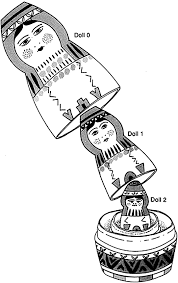